<a href="https://colab.research.google.com/github/jokoeliyanto/MySkill_DS/blob/main/Bread_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import pandas as pd
import numpy as np

## Load Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [ ]:
data.data

In [ ]:
# Menyimpan data dalam dataframe
df = pd.DataFrame(data.data)
df.sample(2)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675
35,16.74,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656,...,20.01,29.02,133.50,1229.0,0.1563,0.3835,0.54090,0.18130,0.4863,0.08633


In [ ]:
cols = data.feature_names
df.set_axis(cols, axis=1, inplace=True)
df.sample(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.9,1866.0,0.11930,0.2336,0.2687,0.17890,0.2551,0.06589
243,13.75,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.02344,0.1773,0.05429,...,15.01,26.34,98.0,706.0,0.09368,0.1442,0.1359,0.06106,0.2663,0.06321


In [ ]:
df['label'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Data Understanding

In [ ]:
# Jumlah kolom dan baris
df.shape

(569, 31)

In [ ]:
# Check tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df[df['label']==1].describe()

In [ ]:
df[df['label']==0].describe()

In [ ]:
mean_jinak = df[df['label']==1].describe().iloc[1,:10]
mean_ganas = df[df['label']==0].describe().iloc[1,:10]

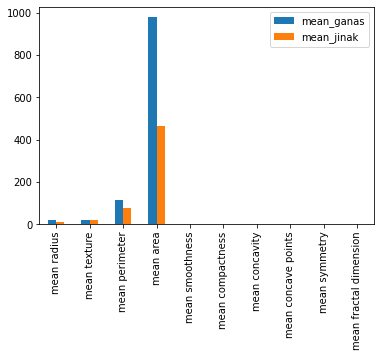

In [ ]:
df_plot = pd.DataFrame({'mean_ganas':mean_ganas, 'mean_jinak':mean_jinak})
df_plot.plot(kind='bar')

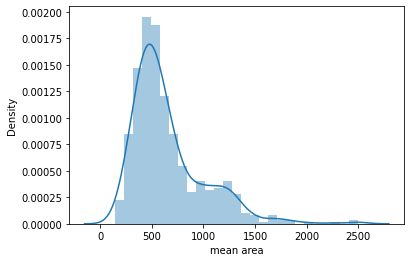

In [ ]:
# melihat distribusi per kolom
sns.distplot(df["mean area"])

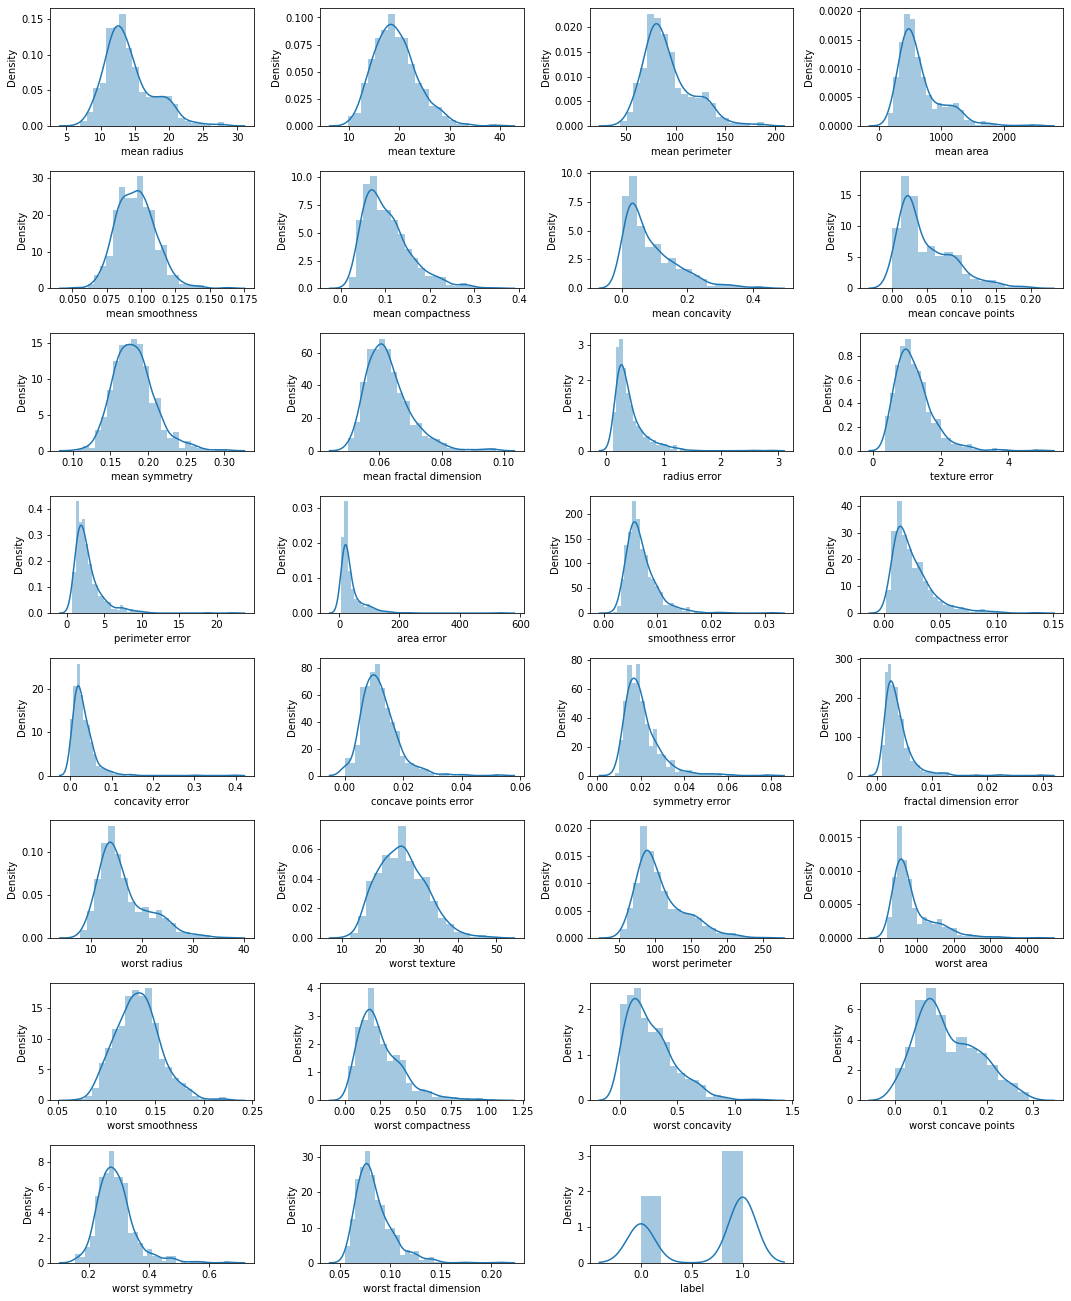

In [ ]:
numerik = df.select_dtypes(exclude='object').copy()

fig = plt.figure(figsize=(15,20))
for i in range(len(numerik.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(numerik.iloc[:,i].dropna())
    plt.xlabel(numerik.columns[i])

plt.tight_layout()
plt.show()

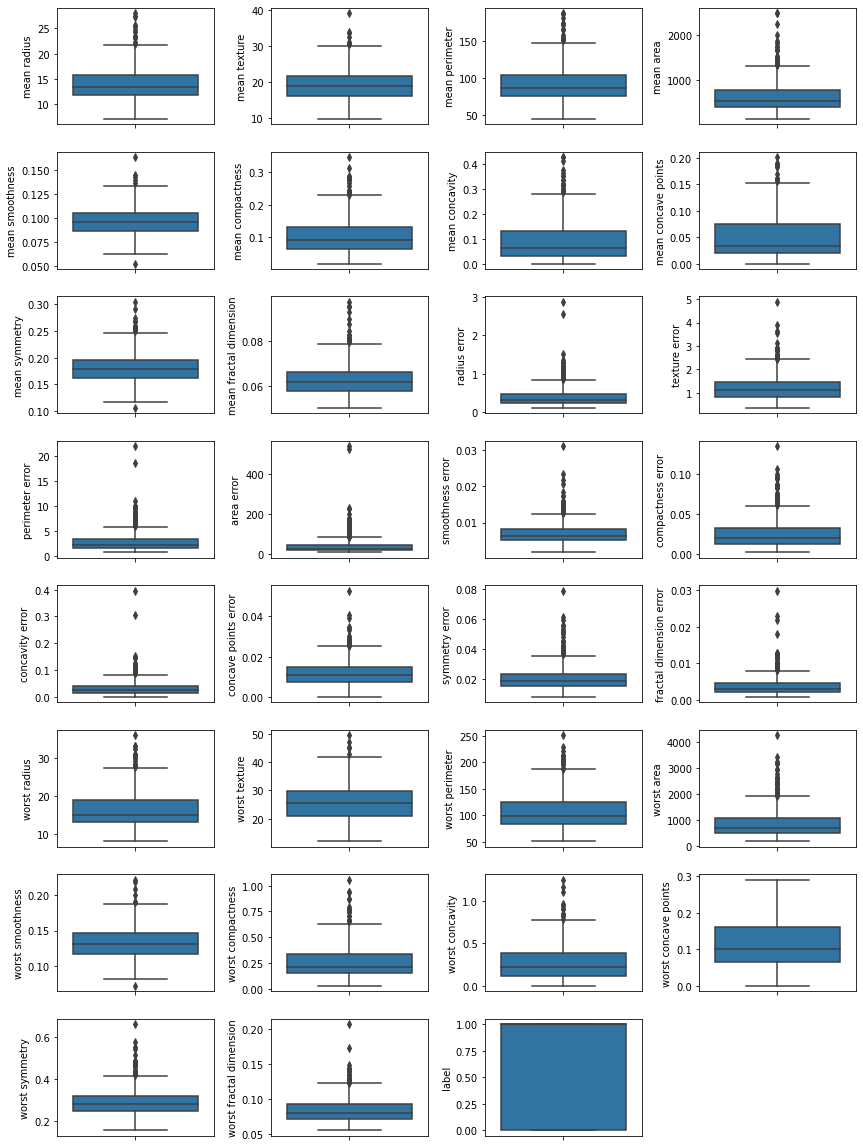

In [ ]:
# Mengecek Outlier 
fig = plt.figure(figsize=(12, 18))

for i in range(len(numerik.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=numerik.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
df.label.value_counts()

1    357
0    212
Name: label, dtype: int64

## Data Pre Processing / Feature Engineering

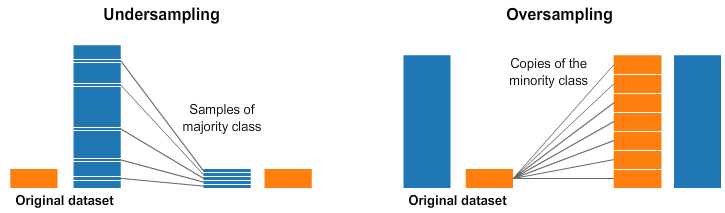

In [ ]:
# class count
class_count_1, class_count_0 = df['label'].value_counts()

# Separate class
class_0 = df[df['label'] == 0]
class_1 = df[df['label'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (212, 31)
class 1: (357, 31)


In [ ]:
class_1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


In [ ]:
class_count_1

357

total class of Yes and No: 1    212
0    212
Name: label, dtype: int64


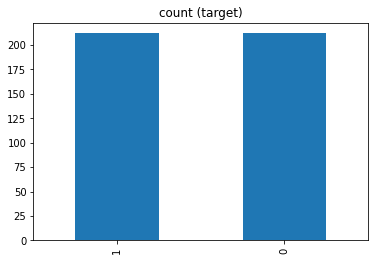

In [ ]:
class_1_under = class_1.sample(class_count_0)

df_use = pd.concat([class_1_under, class_0], axis=0)

print("total class of Yes and No:",df_use['label'].value_counts())# plot the count after under-sampeling
df_use['label'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
df_norm = (X-X.min())/(X.max()-X.min())
df_norm = pd.concat((df_norm, df.label), 1)

In [ ]:
X = df_use.drop(['label'], axis=1)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
480,12.16,18.03,78.29,455.3,0.09087,0.07838,0.029160,0.01527,0.1464,0.06284,...,13.34,27.87,88.83,547.4,0.12080,0.22790,0.16200,0.0569,0.2406,0.07729
200,12.23,19.56,78.54,461.0,0.09586,0.08087,0.041870,0.04107,0.1979,0.06013,...,14.44,28.36,92.15,638.4,0.14290,0.20420,0.13770,0.1080,0.2668,0.08174
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,0.1454,0.06147,...,15.48,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.1105,0.2258,0.08004
208,13.11,22.54,87.02,529.4,0.10020,0.14830,0.087050,0.05102,0.1850,0.07310,...,14.55,29.16,99.48,639.3,0.13490,0.44020,0.31620,0.1126,0.4128,0.10760
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.0268,0.2280,0.07028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.317400,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,0.1590,0.05648,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.1418,0.2218,0.07820


In [ ]:
df_norm = df_norm.dropna()

In [ ]:
df_norm.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [ ]:
# Split data into X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_norm.drop(['label'], axis=1),
    df_norm.label,
    test_size= 0.2,
    random_state=0,
    stratify=df_norm.label
)

In [ ]:
# Print according to the expected result
print('The number of rows and columns of X_train is:', X_train.shape,', while the number of rows and columns of y_train is:', y_train.shape)
print('Churn percentage in Training data is:')
print(y_train.value_counts(normalize=True))
print('The number of rows and columns of X_test is:', X_test.shape,', while the number of rows and columns of y_test is:', y_test.shape)
print('Churn percentage in Testing data is:')
print(y_test.value_counts(normalize=True))

The number of rows and columns of X_train is: (339, 30) , while the number of rows and columns of y_train is: (339,)
Churn percentage in Training data is:
1    0.501475
0    0.498525
Name: label, dtype: float64
The number of rows and columns of X_test is: (85, 30) , while the number of rows and columns of y_test is: (85,)
Churn percentage in Testing data is:
0    0.505882
1    0.494118
Name: label, dtype: float64


## Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

import pickle

from pathlib import Path 

## Logistic Regression



### Modeling

Next we will create a model using the **Logistic Regression** Algorithm.

Use **LogisticRegression()** to call the algorithm, fit to the train data and save it as **log_model**

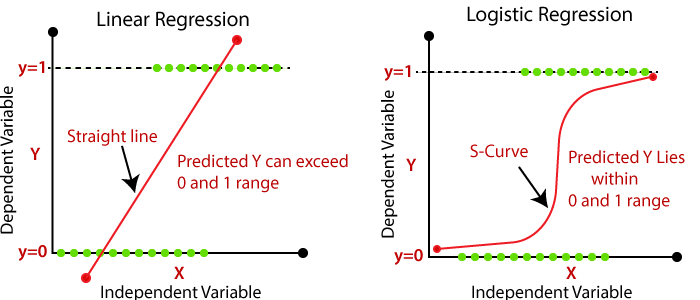

In [ ]:
log_model = LogisticRegression().fit(X_train,y_train)
print('The Logistic Regression model formed is: \n', log_model)

The Logistic Regression model formed is: 
 LogisticRegression()


### Model Performance On Data Training - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the training data as shown below. Use **classification_report()** & **confusion_matrix()**.

In [ ]:
# Predict
y_train_pred = log_model.predict(X_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       169
           1       0.95      0.99      0.97       170

    accuracy                           0.97       339
   macro avg       0.97      0.97      0.97       339
weighted avg       0.97      0.97      0.97       339



### Model Performance on Data Training - Display Confusion Matrix Plots

After getting the results of the classification report in the previous stage, now we will visualize the report.

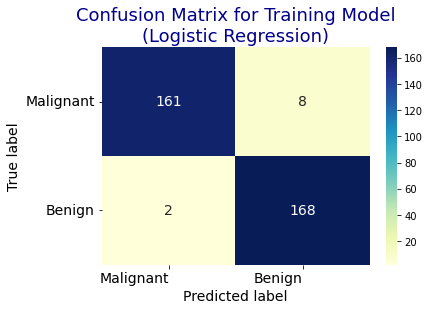

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('Malignant', 'Benign'), ('Malignant', 'Benign'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Model Performance on Data Testing - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the data testing as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [ ]:
# Predict
y_test_pred = log_model.predict(X_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.93      1.00      0.97        42

    accuracy                           0.96        85
   macro avg       0.97      0.97      0.96        85
weighted avg       0.97      0.96      0.96        85



### Model Performance on Data Testing - Display Confusion Matrix Plots

After displaying the metrics in the previous stage, now we will visualize the metrics that have been generated previously

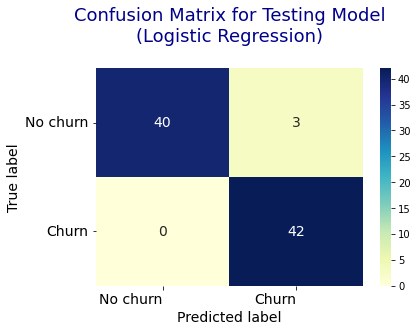

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

## Random Forest Classifier

### Modeling

Next we will create a model using the **Random Forest Classifier** Algorithm.

Use **RandomForestClassifier()** to call the algorithm, fit to train data and save as **rdf_model**

In [ ]:
#Train the model
rdf_model = RandomForestClassifier().fit(X_train,y_train)
print(rdf_model)

RandomForestClassifier()


### Model Performance On Data Training - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the **training data** as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [ ]:
# Predict
y_train_pred = rdf_model.predict(X_train)
# Print classification report 
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       170

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339



### Model Performance On Data Training - Display Confusion Matrix Plots

After displaying the metrics in the previous stage, then we will visualize the metrics

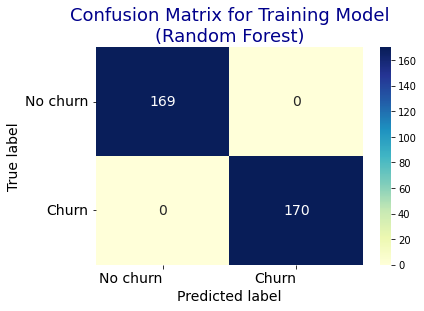

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Model Performance On Data Testing - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in **data testing** as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [ ]:
# Predict
y_test_pred = rdf_model.predict(X_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest) :
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.93      0.95      0.94        42

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85



### Model Performance On Data Testing - Display Confusion Matrix Plots

Show a visualization of the results of the metrics that have been obtained in the previous stage

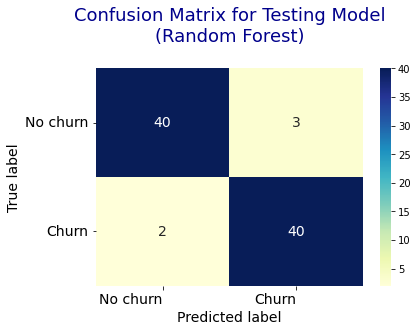

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

## Gradient Boosting Classifier

### Modeling

Next we will create a model using the Gradient Boosting Classifier Algorithm.

 
Use **GradientBoostingClassifier()** to call the algorithm, fit to train data and save as **gbt_model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(X_train,y_train)
print(gbt_model)

GradientBoostingClassifier()


### Model Performance On Data Training - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the training data as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [ ]:
# Predict
y_train_pred = gbt_model.predict(X_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       170

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339



### Model Performance On Data Training - Display Confusion Matrix Plots

Show a visualization of the results of the metrics that have been obtained in the previous stage

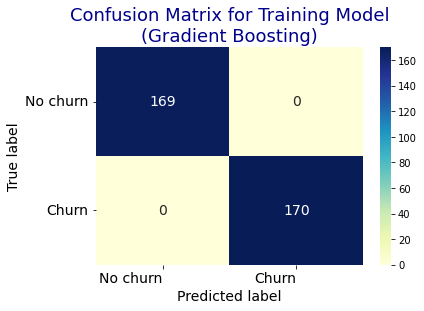

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Model Performance on Data Testing - Displaying Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the data testing as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [ ]:
# Predict
y_test_pred = gbt_model.predict(X_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting) :
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.93      0.90      0.92        42

    accuracy                           0.92        85
   macro avg       0.92      0.92      0.92        85
weighted avg       0.92      0.92      0.92        85



### Model Performance On Data Testing - Display Confusion Matrix Plots

Show a visualization of the results of the metrics that have been obtained in the previous stage

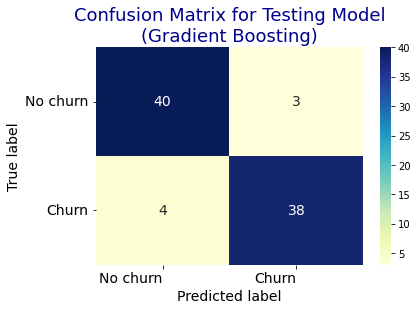

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# 6 Determining the Best Model Algorithm



A good model is a model that is able to provide good performance in the training and testing phases of the model.

* Over-Fitting is a condition where the model is able to predict very well in the training phase, but cannot predict as well in the testing phase.
* Under-Fitting is a condition where the model is not able to predict well in the training phase, but is able to predict well in the testing phase.
* Appropriate-Fitting is a condition where the model is able to predict well in the training phase and in the testing phase.

For detailed details, can be seen in the illustration below:

<table>
  <tr><td>
    <img src="https://raw.githubusercontent.com/jokoeliyanto/ppp/main/images/download.png">
  </td></tr>
<table>

Next, we will determine the best algorithm model from the model that has been done above (Appropriate-Fitting), then we save it as a best_model_churn.pkl file with the aim of modeling later we don't need to repeat the modeling, just call the file. Save in the file directory according to the dataset, then check whether the file is properly saved or not. Use **dump()** from **pickle** to save the file. You can use the code below to save the model file to try on your local laptop.

In [ ]:
print(log_model)

LogisticRegression()


In [ ]:
import joblib

filename = 'finalized_model.sav'
joblib.dump(log_model, filename)

['finalized_model.sav']

In [ ]:
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9647058823529412
